In [1]:
%matplotlib inline

from datetime import datetime
import numpy as np

from utils.data_cube_utilities.data_access_api import DataAccessApi

import dc_au_colormaps

from dc_notebook_utilities import *

dc = DataAccessApi()

,Min,Max,Resolution
Date:,2005-01-08,2016-04-12,
Longitude:,34.5938731845,36.9535538925,0.000269493
Latitude:,-0.9522535155,0.9606077985,-0.000269493


/home/localuser/Datacube/datacube_env/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


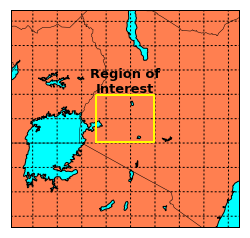

In [5]:
# Save the form values
platform = 'LANDSAT_7'
product = 'ls7_ledaps_kenya'

#get some metadata
metadata = dc.get_datacube_metadata(platform, product)

# Get the pixel resolution of the selected product
resolution = dc.dc.list_products().resolution[dc.dc.list_products().name == product]

# Display metadata
generate_metadata_report(metadata['time_extents'][0].strftime("%Y-%m-%d"),
                         metadata['time_extents'][1].strftime("%Y-%m-%d"), 
                         metadata['lon_extents'][0], metadata['lon_extents'][1], resolution.values[0][1],
                         metadata['lat_extents'][0], metadata['lat_extents'][1], resolution.values[0][0])

show_map_extents(metadata['lon_extents'][0], metadata['lon_extents'][1], 
                 metadata['lat_extents'][0], metadata['lat_extents'][1])

In [3]:
# Save form values
start_date = datetime.strptime('2005-1-8', '%Y-%m-%d')
end_date = datetime.strptime('2006-1-8', '%Y-%m-%d')
min_lon = 34.594
max_lon = 35.594
min_lat = 0
max_lat = 0.961

# Query the Data Cube
dataset_in = dc.load(platform=platform,
                     product=product,
                     time=(start_date, end_date),
                     lon=(min_lon, max_lon), 
                     lat=(min_lat, max_lat))

In [4]:
print(dataset_in)
ndvi = (dataset_in.nir - dataset_in.red) / (dataset_in.nir + dataset_in.red)

<xarray.Dataset>
Dimensions:            (latitude: 3566, longitude: 3712, time: 14)
Coordinates:
  * time               (time) datetime64[ns] 2005-01-08T07:38:21 ...
  * latitude           (latitude) float64 0.9609 0.9606 0.9603 0.9601 0.9598 ...
  * longitude          (longitude) float64 34.59 34.59 34.59 34.59 34.59 ...
Data variables:
    blue               (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    green              (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    red                (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    nir                (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    swir1              (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    swir2              (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    cf_mask            (time, latitude, longitude) int16 255 255 255 255 255 ...
    cf_mask_conf       (time, latitude, longitude) int16 255 255 255 255 255 ...
    adjacent_cloud_qa  (

In [5]:
#print(ndvi)
dataset_in['ndvi'] = ndvi
print(dataset_in)

<xarray.Dataset>
Dimensions:            (latitude: 3566, longitude: 3712, time: 14)
Coordinates:
  * time               (time) datetime64[ns] 2005-01-08T07:38:21 ...
  * latitude           (latitude) float64 0.9609 0.9606 0.9603 0.9601 0.9598 ...
  * longitude          (longitude) float64 34.59 34.59 34.59 34.59 34.59 ...
Data variables:
    blue               (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    green              (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    red                (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    nir                (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    swir1              (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    swir2              (time, latitude, longitude) int16 -9999 -9999 -9999 ...
    cf_mask            (time, latitude, longitude) int16 255 255 255 255 255 ...
    cf_mask_conf       (time, latitude, longitude) int16 255 255 255 255 255 ...
    adjacent_cloud_qa  (

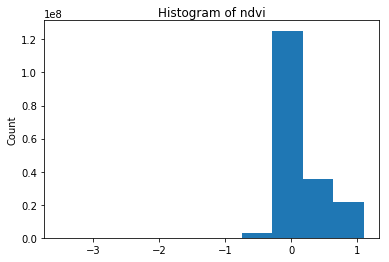

In [6]:
hist = dataset_in.ndvi.plot()

In [7]:
mean_ndvi = dataset_in.ndvi.mean(dim='time')
print(mean_ndvi)

<xarray.DataArray 'ndvi' (latitude: 3566, longitude: 3712)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.41911207,
         0.40223919,  0.39457381],
       [ 0.        ,  0.        ,  0.        , ...,  0.39681915,
         0.44437792,  0.46560888],
       [ 0.        ,  0.        ,  0.        , ...,  0.42041592,
         0.39902756,  0.39661305]])
Coordinates:
  * latitude   (latitude) float64 0.9609 0.9606 0.9603 0.9601 0.9598 0.9595 ...
  * longitude  (longitude) float64 34.59 34.59 34.59 34.59 34.59 34.6 34.6 ...


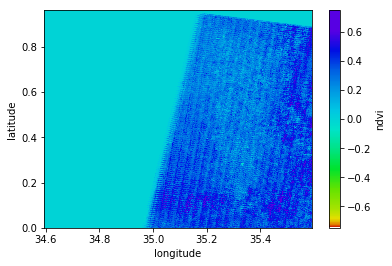

In [8]:
mean_ndvi.plot(cmap='dc_au_WaterSummary')